This work was done by YK and PM.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

# A03.1 Centrality correlations

In [2]:
# Read the datasets
import os

def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        allFiles.append(entry)    
    return allFiles

myfiles = getListOfFiles('./data-assignment3')

In [3]:
def plot_centrality_scatter(degree, close, between, eigen, title):
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(15, 18))

    # 1: Plot the degree vs closeness centrality
    x = []
    y = []
    for k in degree.keys():
        x.append(degree[k])
        y.append(close[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax1.scatter(x,y)
    ax1.set_title('Degree vs Closeness Centrality ' + title.split('.')[0])
    ax1.set_xlabel('Degree Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax1.set_ylabel('Closeness Centrality')
    
    
    # 2: Plot the degree vs betweenness centrality
    x = []
    y = []
    for k in degree.keys():
        x.append(degree[k])
        y.append(between[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax2.scatter(x,y)
    ax2.set_title('Degree vs Betweenness Centrality ' + title.split('.')[0])
    ax2.set_xlabel('Degree Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax2.set_ylabel('Betweenness Centrality')
    
    
    # 3: Plot the degree vs eigenvector centrality
    x = []
    y = []
    for k in eigen.keys():
        x.append(degree[k])
        y.append(eigen[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax3.scatter(x, y)
    ax3.set_title('Degree vs Eigenvector Centrality ' + title.split('.')[0])
    ax3.set_xlabel('Degree Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax3.set_ylabel('Eigenvector Centrality')
    
    
    # 4: Plot the closeness vs betweenness centrality
    x = []
    y = []
    for k in close.keys():
        x.append(close[k])
        y.append(between[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax4.scatter(x, y)
    ax4.set_title('Closeness vs Betweenness Centrality ' + title.split('.')[0])
    ax4.set_xlabel('Closeness Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax4.set_ylabel('Betweenness Centrality')
    
    
    # 5: Plot the closeness vs eigenvector centrality
    x = []
    y = []
    for k in close.keys():
        x.append(close[k])
        y.append(eigen[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax5.scatter(x, y)
    ax5.set_title('Closeness vs Eigenvector Centrality ' + title.split('.')[0])
    ax5.set_xlabel('Closeness Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax5.set_ylabel('Eigenvector Centrality')
    

    # 6: Plot the betweenness vs eigenvector centrality
    x = []
    y = []
    for k in between.keys():
        x.append(between[k])
        y.append(eigen[k])
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax6.scatter(x, y)
    ax6.set_title('Betweenness vs Eigenvector Centrality ' + title.split('.')[0])
    ax6.set_xlabel('Betweenness Centrality \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax6.set_ylabel('Eigenvector Centrality')
    

    fig.tight_layout(pad=3.0)
    plt.show()

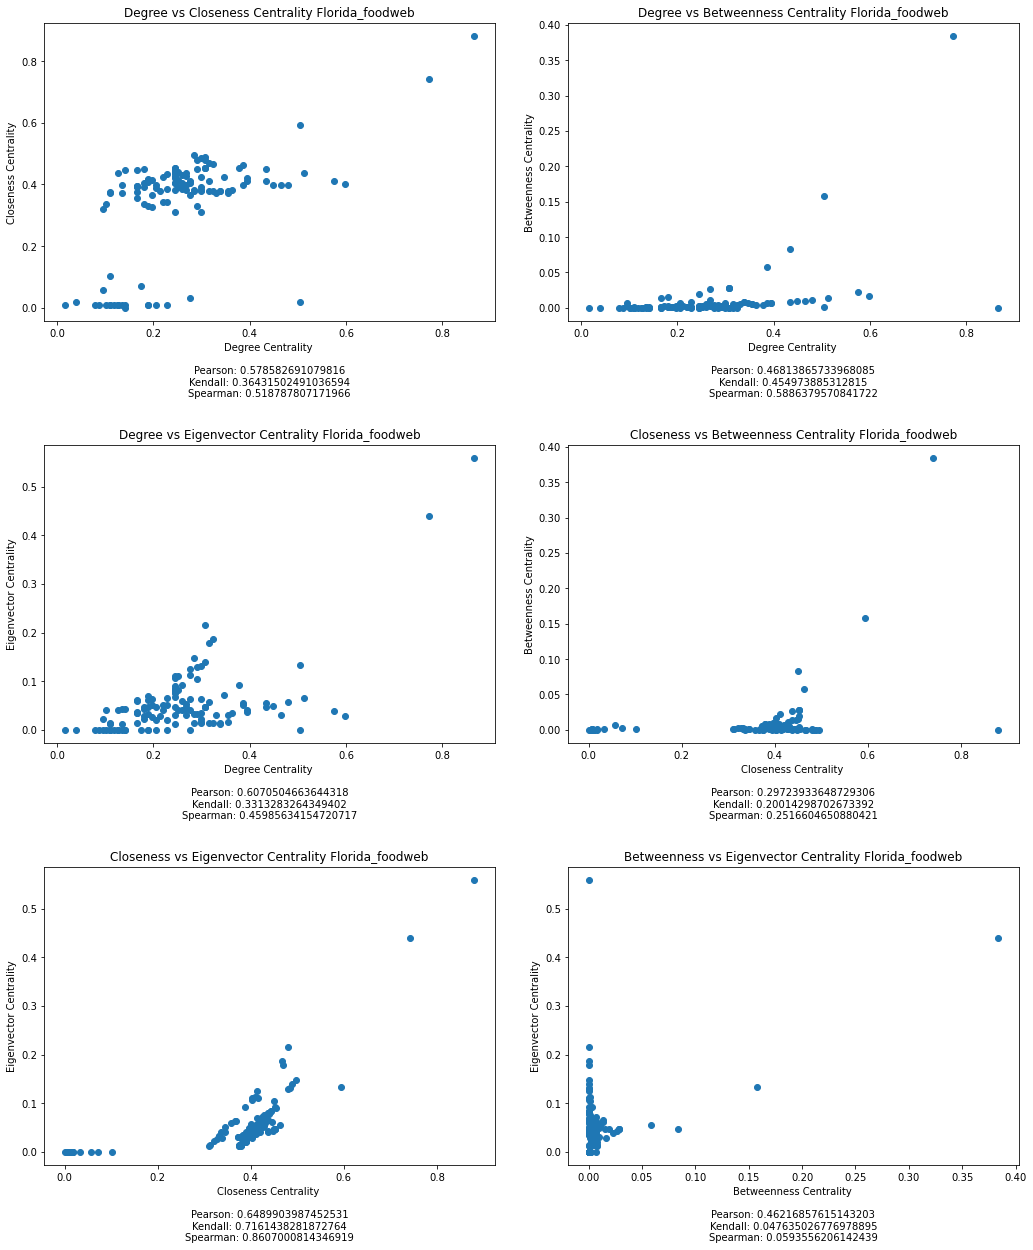

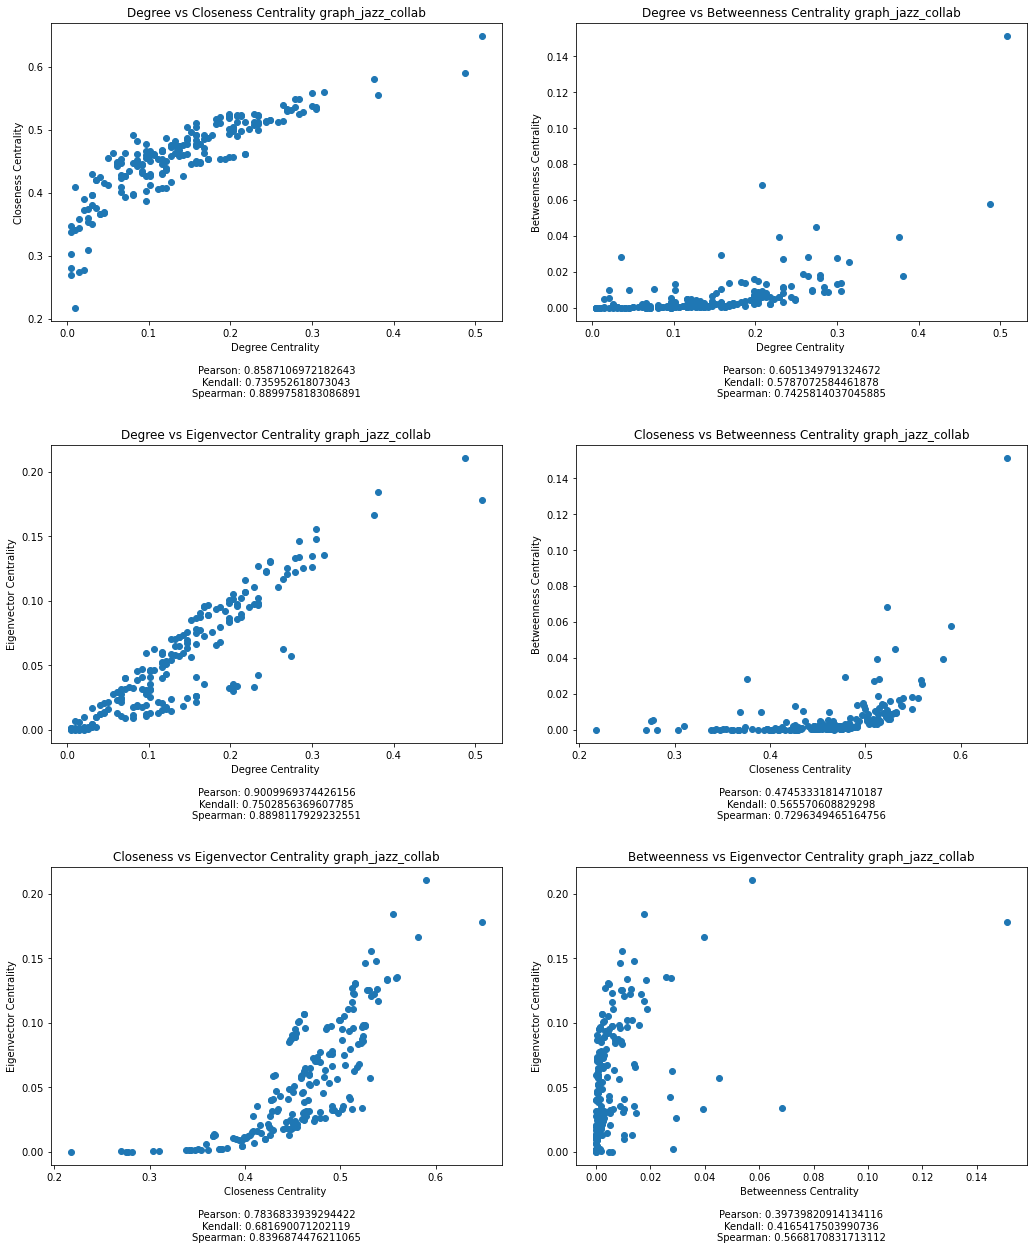

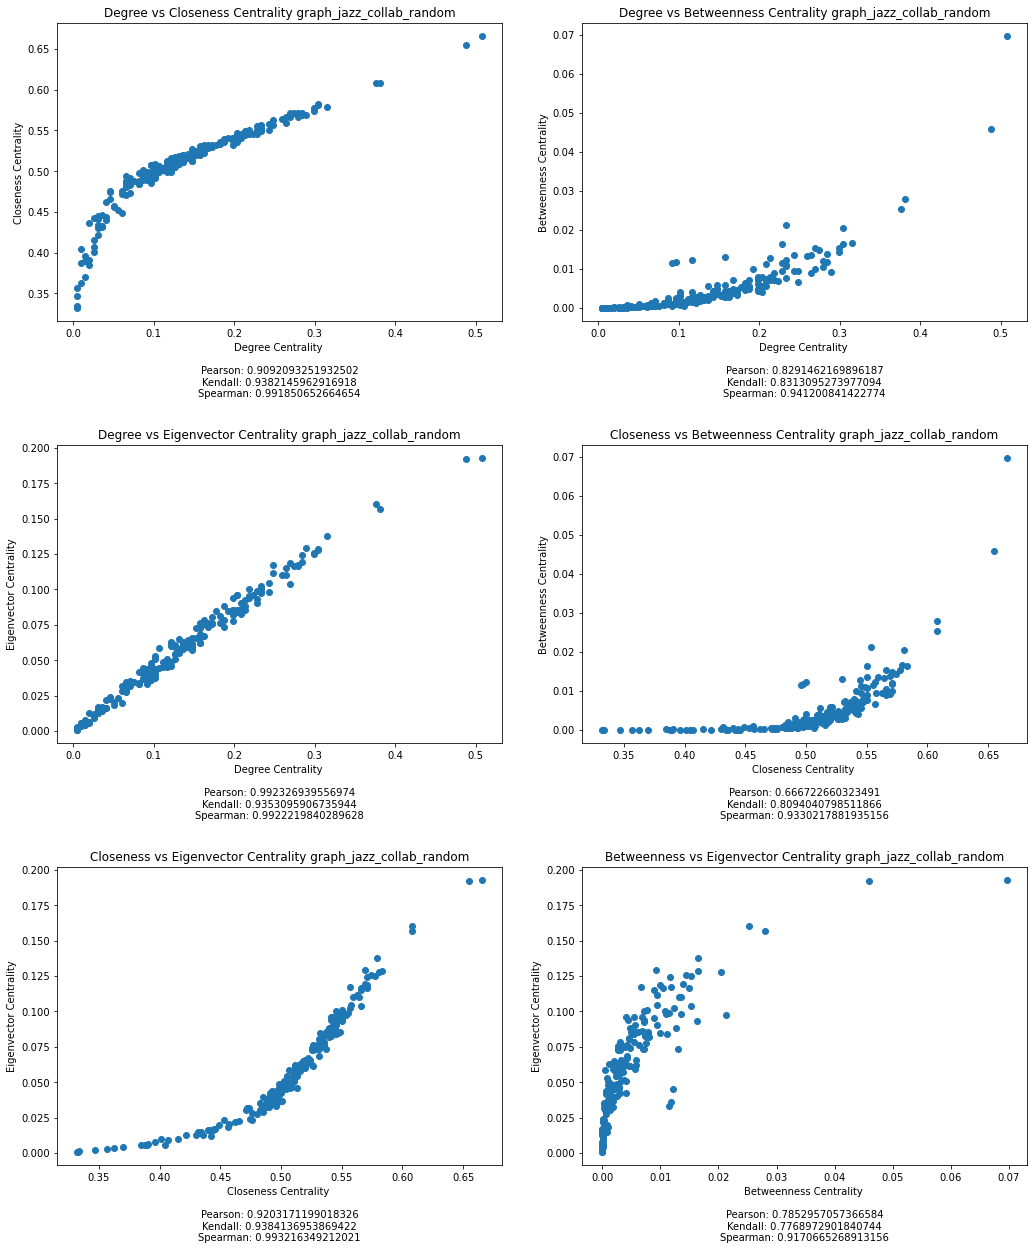

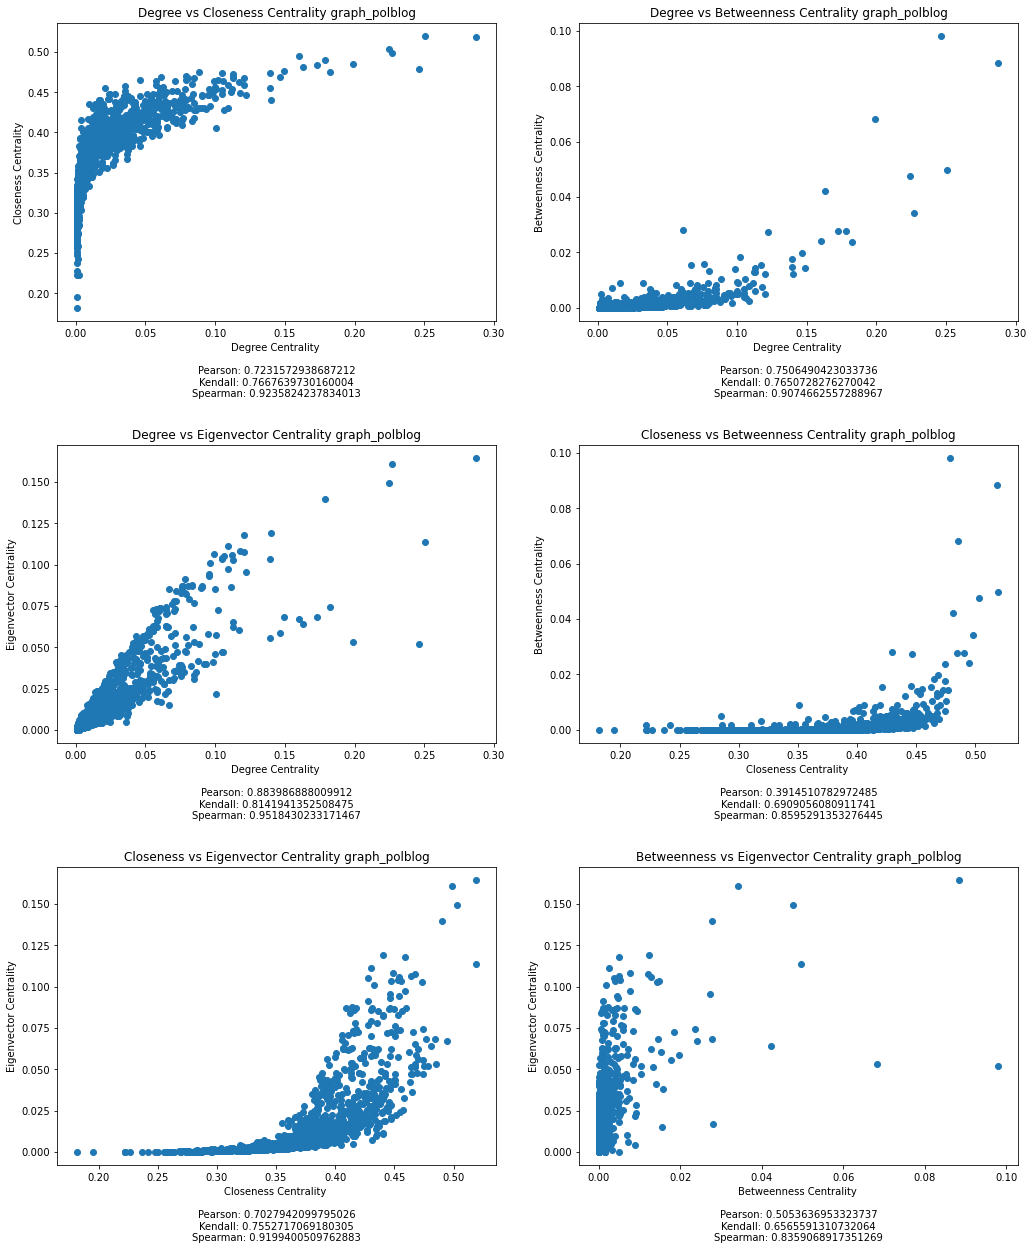

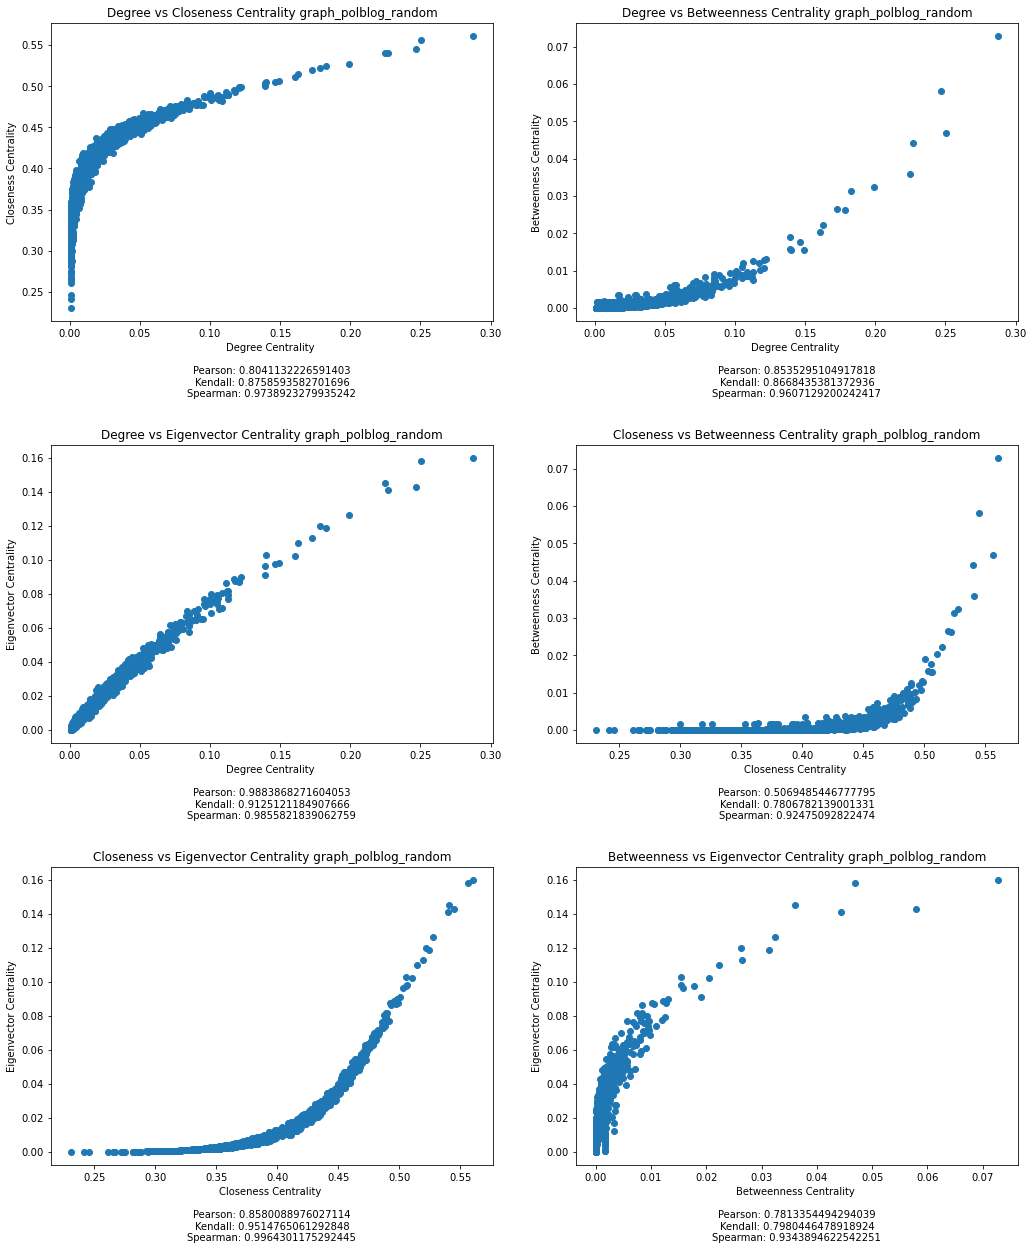

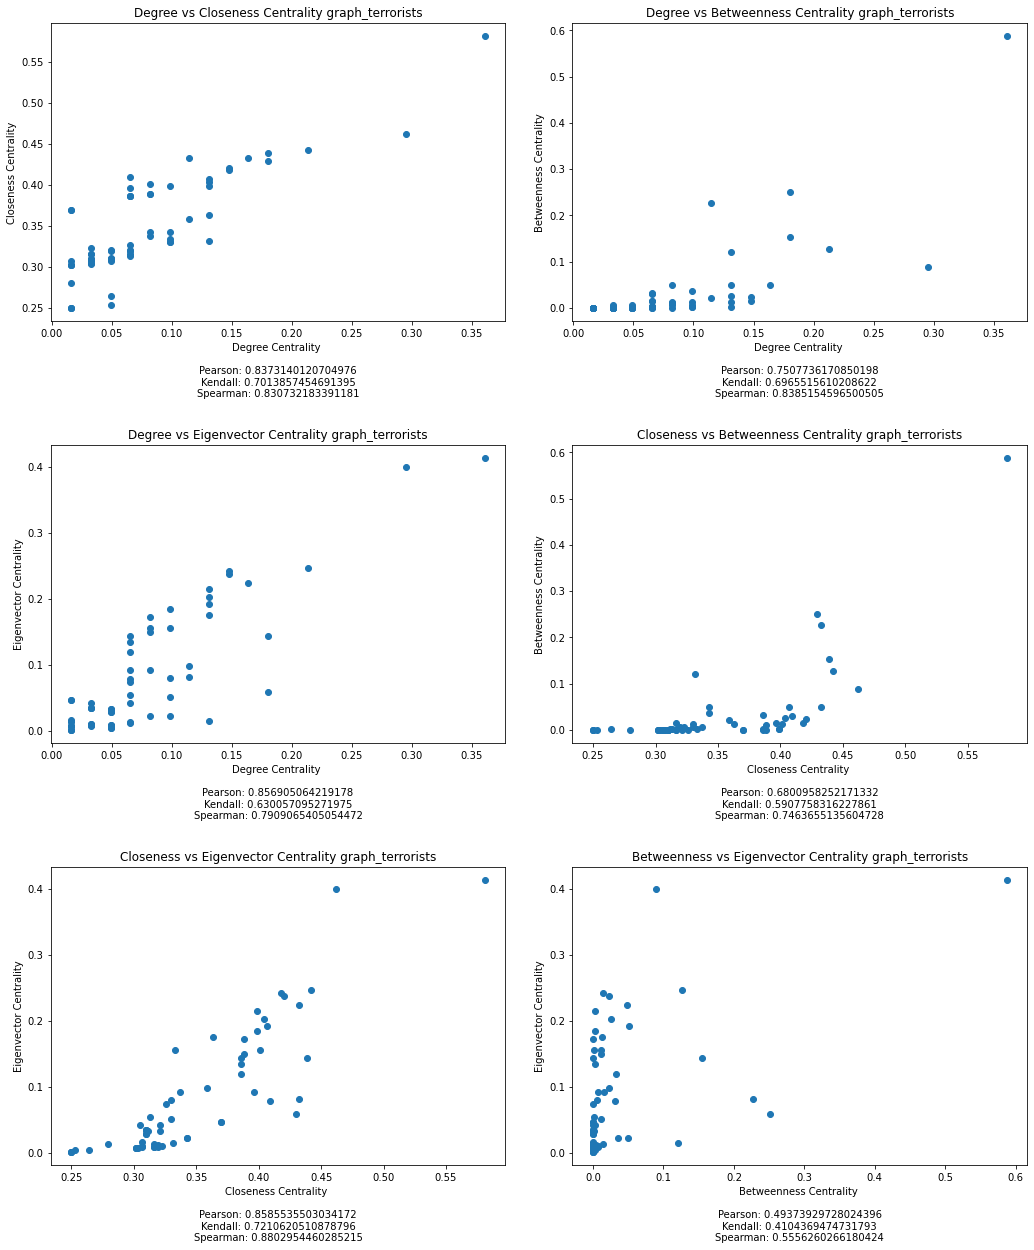

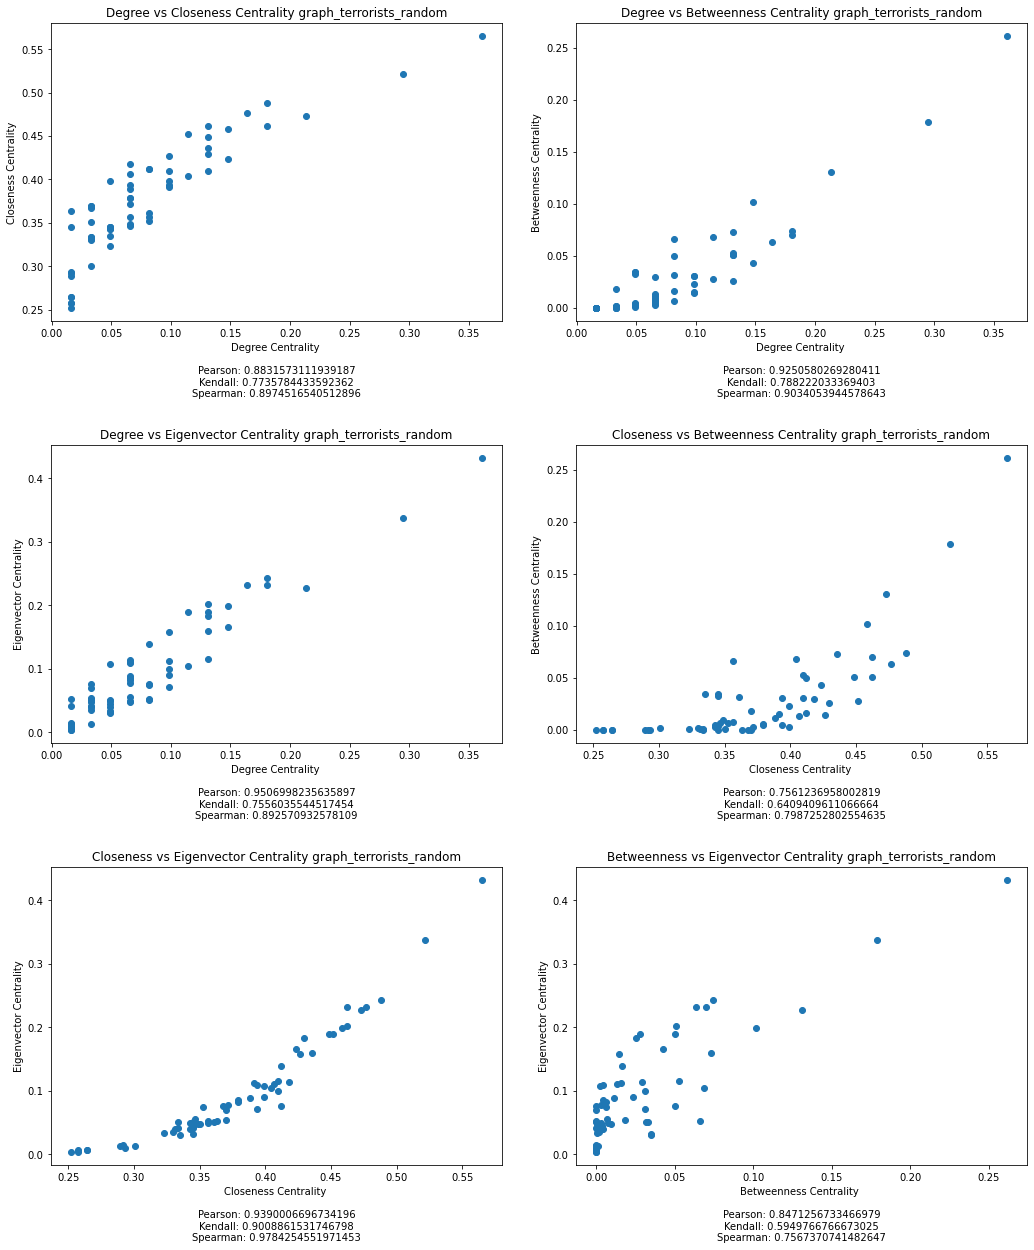

In [4]:
# Learn about centrality measures & how they correlate in different networks
for i in range(len(myfiles)) :
    # Read a file
    if i == 0:
        g = nx.read_graphml('./data-assignment3/' + myfiles[i])
    else:
        g = nx.read_gml('./data-assignment3/' + myfiles[i])
    # 1. degree ki, closeness ci, betweenness bi and eigenvector ei centrality for each node
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    # 2. scatter plot for each pair of centralities & 
    # 3. compute Pearson's, Spearman's and Kendall's correlation coefficients for each pair and note them on the scatter plots
    plot_centrality_scatter(degree_cen, close_cen, between_cen, eigen_cen, myfiles[i])

    Briefly explain, for the Jazz collaborations data, what each of the centrality measures means in practice
- Degree centrality shows the jazz player with the highest number of collaborations with other players. Therefore, it represents the popularity among players.
- Closeness centrality reveals the most accessible jazz player of all. Hence, it shows how easily a player can reach all other jazz players.
- Betweenness centrality indicates the most influential player in terms of the flow of information through the network. Thus, it shows the control of information flow.
- Eigenvector centrality specifies the top jazz player connected to other highly connected ones.

# A03.2 Centrality and randomisation

In [5]:
def plot_centrality_random_scatter(g, g_rnd, title):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
    # Plot the degree centrality
    degree_cen_rnd = nx.degree_centrality(g_rnd)
    degree_cen = nx.degree_centrality(g)
    
    x = []
    y = []
    for k in degree_cen.keys():
        x.append(degree_cen_rnd[k])
        y.append(degree_cen[k])
        
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax1.scatter(x,y)
    ax1.set_title('Degree Centrality ' + title[6:-4])
    ax1.set_xlabel('k_rnd(i) \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax1.set_ylabel('k(i)')
 
    
    # Plot the closeness centrality
    close_cen_rnd = nx.closeness_centrality(g_rnd)
    close_cen = nx.closeness_centrality(g)
    
    x = []
    y = []
    for k in close_cen.keys():
        x.append(close_cen_rnd[k])
        y.append(close_cen[k])
        
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax2.scatter(x,y)
    ax2.set_title('Closeness Centrality ' + title[6:-4])
    ax2.set_xlabel('k_rnd(i) \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax2.set_ylabel('k(i)')
 
     
    # Plot the betweenness centrality
    between_cen_rnd = nx.betweenness_centrality(g_rnd)
    between_cen = nx.betweenness_centrality(g)
    
    x = []
    y = [] 
    for k in between_cen.keys():
        x.append(between_cen_rnd[k])
        y.append(between_cen[k])
        
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax3.scatter(x,y)
    ax3.set_title('Betweenness Centrality ' + title[6:-4])
    ax3.set_xlabel('k_rnd(i) \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax3.set_ylabel('k(i)')
 

    # Plot the eigenvector centrality
    eigen_cen_rnd = nx.eigenvector_centrality(g_rnd)
    eigen_cen = nx.eigenvector_centrality(g)
    
    x = []
    y = []
    for k in eigen_cen.keys():
        x.append(eigen_cen_rnd[k])
        y.append(eigen_cen[k])   
        
    r, _ = sp.pearsonr(x,y)
    tau, _ = sp.kendalltau(x,y)
    spearman, _ = sp.spearmanr(x,y)
    ax4.scatter(x,y)
    ax4.set_title('Eigenvector Centrality ' + title[6:-4])
    ax4.set_xlabel('k_rnd(i) \n\nPearson: {}\nKendall: {}\nSpearman: {}'.format(r, tau, spearman))
    ax4.set_ylabel('k(i)')
 
     
    fig.tight_layout(pad=3.0)
    plt.show()

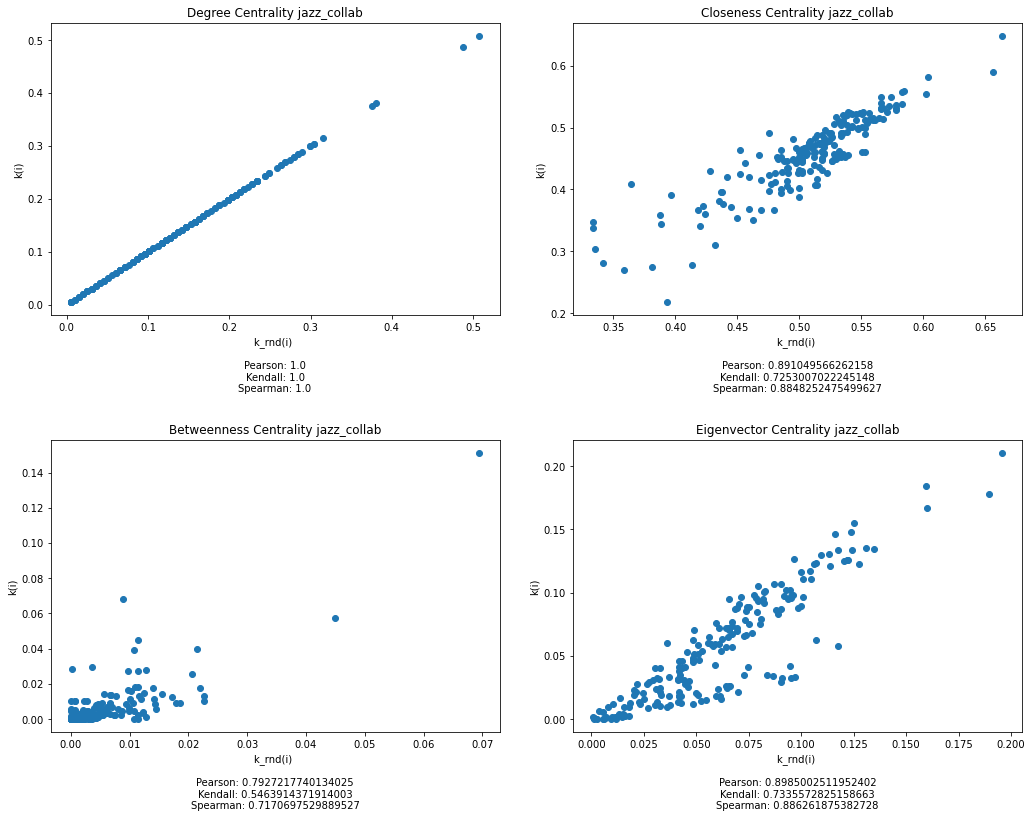

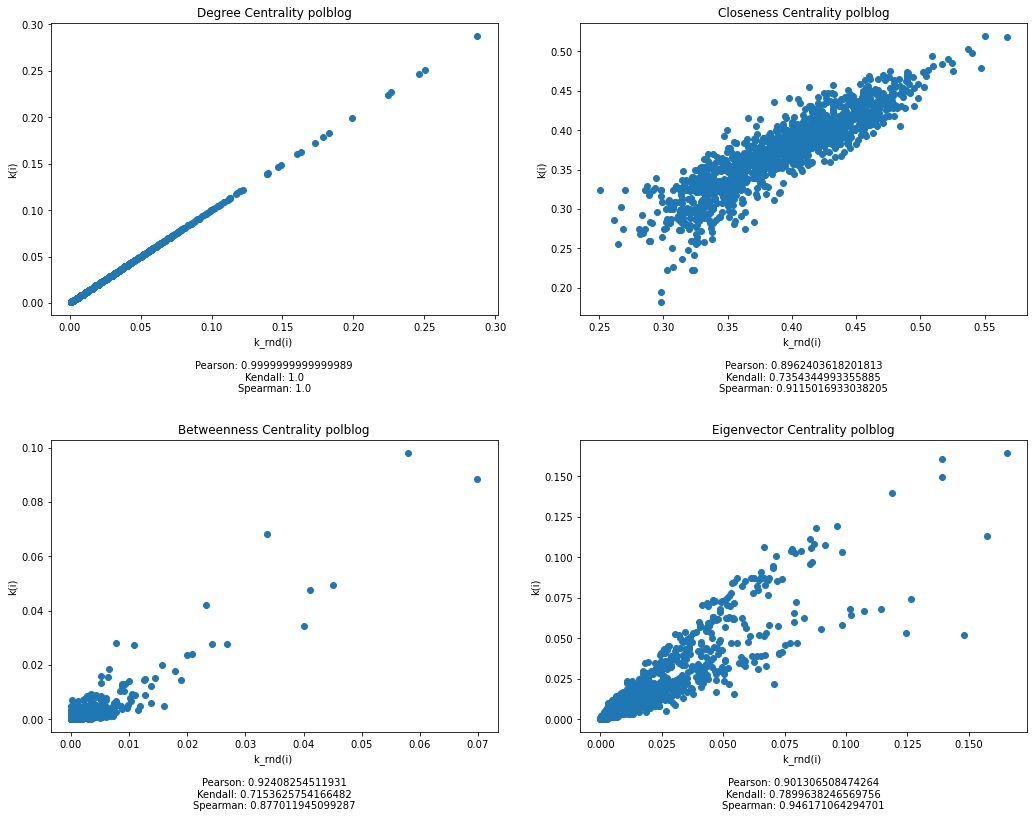

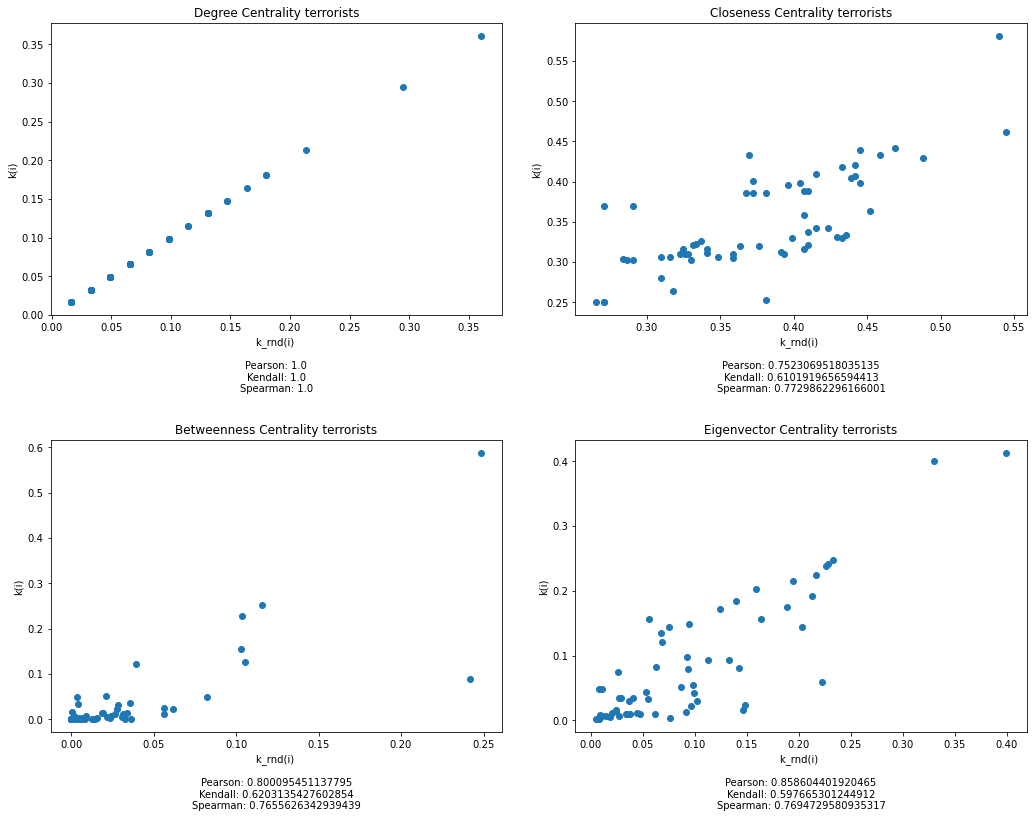

In [6]:
# Explore the effect of rewiring randomisation on centrality metrics
for i in range(len(myfiles)) :
    # Read a file and filter out randomized data and Florida data
    if not "random" in myfiles[i] and not "Florida" in myfiles[i]:
        if i == 0:
            g = nx.read_graphml('./data-assignment3/' + myfiles[i])
        else:
            g = nx.read_gml('./data-assignment3/' + myfiles[i])
        
        # 1. Generate a randomised network
        g_rnd = nx.algorithms.smallworld.random_reference(g, connectivity=False)
        
        # 2. Call funtion compute Pearson's, Spearman's and Kendall's correlation coefficients for each pair and note them on the scatter plots
        plot_centrality_random_scatter(g, g_rnd, myfiles[i])

    Why do you get that result for degree centrality?
- The degre centrality is measured by the number of links a node has to others in a network. The randomisation of a dataset G doesn't affect this property. Therefore, the degree centrality within network G_rnd is the same as the degree ceentrality within G thus explaining the one-to-one correlation.

# A03.3 Page Rank

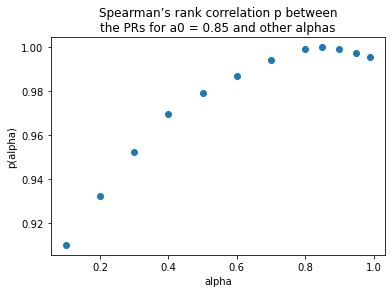

In [7]:
# Rank the nodes’ importance by means of the PageRank algortihm
g = nx.read_graphml('./data-assignment3/Florida_foodweb.graphml')

# 1. Different values of a
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
  
# 2. Compute Spearman's rank correlation p between the PageRanks for a0=0.85 and all other alphas and plot the results
pr85 = nx.pagerank(g, alpha=0.85)

spearmans = []
for a in alphas:#
    spearman, _ = sp.spearmanr([pr85[x] for x in pr85], [nx.pagerank(g, alpha=a)[y] for y in nx.pagerank(g, alpha=a)])
    spearmans.append(spearman)

plt.scatter(alphas, spearmans)
plt.title('Spearman’s rank correlation p between\nthe PRs for a0 = 0.85 and other alphas')
plt.xlabel('alpha')    
plt.ylabel('p(alpha)')
plt.show()